<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML - Week 8 - 31-05-2021
# 18071A0591

---

## 1. Demonstrate LDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

In [ ]:
!wget https://raw.githubusercontent.com/bot13956/linear-discriminant-analysis-iris-dataset/master/iris.data.csv

--2021-05-31 08:38:28--  https://raw.githubusercontent.com/bot13956/linear-discriminant-analysis-iris-dataset/master/iris.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: ‘iris.data.csv’

iris.data.csv       100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-05-31 08:38:28 (53.2 MB/s) - ‘iris.data.csv’ saved [4551/4551]



In [ ]:
df = pd.read_csv('iris.data.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Encode categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [ ]:
# construct within-class covariant scatter matrix, wM
wM = np.zeros((4,4))
for i in range(3):
    wM += np.cov(X_train_std[y==i].T)
wM

array([[1.1672, 0.783 , 0.3461, 0.1839],
       [0.783 , 1.8616, 0.2181, 0.3051],
       [0.3461, 0.2181, 0.1796, 0.0954],
       [0.1839, 0.3051, 0.0954, 0.2178]])

In [ ]:
# construct betweeen-class covariant scatter matrix, bM
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean

bM = np.zeros((4,4))
for i in range(3):
    bM += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

bM

array([[ 92.8059, -54.7706, 113.8033, 113.6835],
       [-54.7706,  58.7821, -73.7624, -68.4292],
       [113.8033, -73.7624, 141.1978, 139.7382],
       [113.6835, -68.4292, 139.7382, 139.3254]])

In [ ]:
# Calculating Sorted Eigen Values and eigen vectors of inverse(wM)) dot product with bM
e_vals, e_vecs = np.linalg.eig(np.linalg.inv(wM).dot(bM))
e_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
e_pairs = sorted(e_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for e_val in e_pairs:
    print(e_val[0])

Eigenvalues in decreasing order:

1581.3259321867617
13.600776328162208
2.4043520410991714e-13
1.5464006568405534e-13


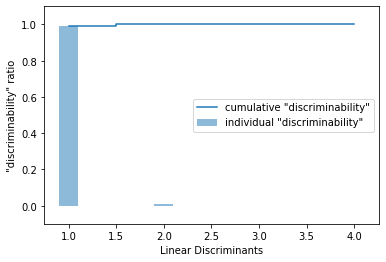

In [ ]:
# Plotting LDA Components
tot = sum(e_vals.real)
discr = [(i / tot) for i in sorted(e_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [ ]:
# Projecting original features onto new feature space
W = np.hstack((e_pairs[0][1][:, ].reshape(4,1),e_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)
X_train_lda

array([[-1.7909,  0.1154],
       [-1.5832, -0.2655],
       [-1.6639, -0.0837],
       [-1.5146, -0.2259],
       [-1.8071,  0.19  ],
       [-1.7109,  0.5209],
       [-1.6027,  0.1325],
       [-1.6901,  0.0059],
       [-1.4582, -0.3469],
       [-1.6323, -0.321 ],
       [-1.8656,  0.2376],
       [-1.6054, -0.0291],
       [-1.6283, -0.3652],
       [-1.6827, -0.2729],
       [-2.1862,  0.5674],
       [-2.0336,  0.9683],
       [-1.9045,  0.6516],
       [-1.7277,  0.214 ],
       [-1.7943,  0.35  ],
       [-1.7822,  0.4085],
       [-1.6659, -0.0549],
       [-1.6847,  0.4314],
       [-1.9281,  0.3161],
       [-1.3875,  0.1617],
       [-1.4602, -0.1272],
       [-1.5046, -0.3297],
       [-1.5153,  0.1704],
       [-1.7607,  0.0839],
       [-1.7748,  0.0409],
       [-1.5187, -0.1817],
       [-1.5025, -0.2563],
       [-1.6363,  0.2077],
       [-2.0296,  0.4396],
       [-2.1035,  0.65  ],
       [-1.6323, -0.321 ],
       [-1.7667, -0.0475],
       [-1.9119,  0.1527],
 

In [ ]:
# To plot transformed features in LDA Subspace
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.790936,0.115414,0
1,-1.583202,-0.265463,0
2,-1.663881,-0.083657,0
3,-1.514646,-0.225901,0
4,-1.807076,0.189973,0


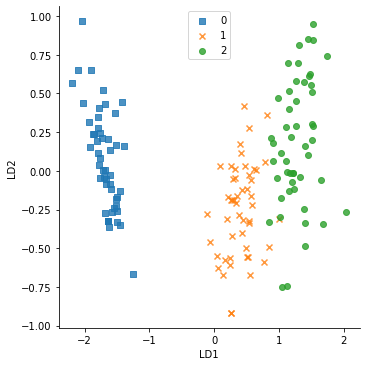

In [ ]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

In [ ]:
# DIRECTLY using SCIKIT LEARN -- LDA implementation is :
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)

In [ ]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.084953,0.328454,0
1,7.147163,-0.755473,0
2,7.511378,-0.238078,0
3,6.837676,-0.642885,0
4,8.157814,0.540639,0


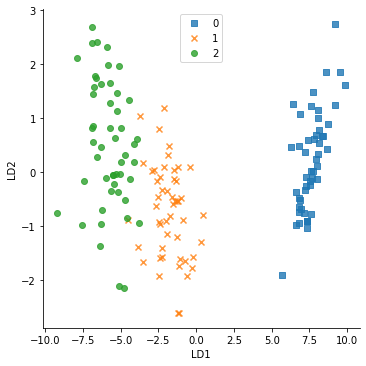

In [ ]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()

## 2. Factor Analysis

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
factor = FactorAnalysis(n_components=4, random_state=101).fit(X)

In [ ]:
df = pd.DataFrame(factor.components_,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(X)
print("Explained variance by component: %s" % pca.explained_variance_ratio_)
df2 = pd.DataFrame(pca.components_,columns=iris.feature_names)
df2.head()

Explained variance by component: [0.9246 0.0531 0.0171 0.0052]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


## 3. Low Variance Filter

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


In [ ]:
a = df.isnull().sum()/len(df)*100
print(a,len(a))

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64 4


In [ ]:
variables = df.columns
v = df.var()
var = []
for i in range(0,len(v)):
  if a[i]<=20:
    var.append(variables[i])

var

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
var = []
for i in range(0,len(v)):
  if a[i]>=10:
    var.append(variables[i+1])

var

[]